In [0]:
from keras.datasets import fashion_mnist
import numpy as np 
import matplotlib.pyplot as plt
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
testX=testX.reshape([10000,784])
trainX= trainX.reshape([60000,784])
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [0]:
def pca_np(x):
  #centering data
  m = np.mean(x, axis =0)
  x_centered = x - m
  #calculating covariance matrix
  x_cov=np.cov(x_centered.T)
  #eigendecompositiont
  eigenvals, eigenvecs = np.linalg.eig(x_cov)
  #sorting
  i= np.argsort(eigenvals)[::-1]
  eigenvecs = eigenvecs[:,i]
  eigenvals= eigenvals[i]
  #returning the eigenvalues, eigenvectors and means
  return(eigenvals, eigenvecs, m)

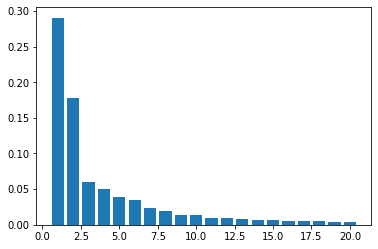

In [0]:
evals, evecs, train_mean = pca_np(trainX)

exp_var =evals/sum(evals)

#plot % of variance explained
plt.bar(range(1,21),exp_var[:20])

from google.colab import files
plt.savefig("eval.png")
files.download("eval.png") 




In [0]:
sum(evals[:10])/sum(evals)

0.7199082703777664

In [0]:
n =10 
X_evecs_n = evecs[:,:n]
#projecting the training and test data back onto the retained eigenvectors to get our factors for use in KNN
trainX_factors = np.dot(trainX-train_mean,X_evecs_n)
testX_factors= np.dot(testX-train_mean,X_evecs_n)
#checking dimension after PCA
print(trainX_factors.shape)
print(testX_factors.shape)


(60000, 10)
(10000, 10)


In [0]:
import numpy as np
import time

def knn_np(x_train, y_train, K, X_test, dist = 'euclidean'):
    if dist !='euclidean' :
        dist = (abs(X_test - x_train)).sum(axis = 1)
    else:
        dist = np.sqrt(((X_test - x_train)**2).sum(axis=1)) 
        
        

    arg_ascending = np.argsort(dist)
    
    classes = np.zeros(10)
    
    for i in range(k):
            if y_train[arg_ascending[i]]==0: #class = 0
                classes[0] += 1
            elif y_train[arg_ascending[i]]==1: #class = 1
                classes[1] += 1
            elif y_train[arg_ascending[i]]==2: #class = 2
                classes[2] += 1
            elif y_train[arg_ascending[i]]==3: #class = 3
                classes[3] += 1
            elif y_train[arg_ascending[i]]==4: #class = 4
                classes[4] += 1
            elif y_train[arg_ascending[i]]==5: #class = 5
                classes[5] += 1
            elif y_train[arg_ascending[i]]==6: #class = 6
                classes[6] += 1
            elif y_train[arg_ascending[i]]==7: #class = 7
                classes[7] += 1
            elif y_train[arg_ascending[i]]==8: #class = 8
                classes[8] += 1
            elif y_train[arg_ascending[i]]==9: #class = 9
                classes[9] += 1
           
            
    return np.argmax(classes)




In [0]:
import time

k=10
wrong = 0
#iterating through every point in test set and applying knn
start_time = time.time()
for i in range(testX_factors.shape[0]):
    prediction = knn_np(trainX_factors, trainY, k, testX_factors[i], dist='manhattan')
    if prediction != testY[i]:
        wrong += 1

end_time = time.time()
print("Accuracy=", 1-wrong/testX_factors.shape[0])
print("----Runtime:%.0fmin%.0fs----" %((end_time- start_time) // 60, (end_time- start_time) % 60))


Accuracy= 0.815
----Runtime:1min25s----
